In [1]:
bse_indices=['SENSEX', 'BANKEX', 'SX50']

In [103]:
import requests
import time
import datetime
import json

url_base='https://www.bseindia.com'
url1='https://api.bseindia.com/RealTimeBseIndiaAPI/api/GetSensexData/w'
#sensex io
url2='https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry=19+May+2023&ProductType=IO&scrip_cd=1' 
#bankex io
url3='https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry=19+May+2023&ProductType=IO&scrip_cd=12'
# sx50 io
url4='https://api.bseindia.com/BseIndiaAPI/api/DerivOptionChain/w?Expiry=18+May+2023&ProductType=IO&scrip_cd=47'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36','accept-language': 'en,gu;q=0.9,hi;q=0.8','accept-encoding': 'gzip, deflate, br'}

In [125]:
sess=requests.Session()
response=sess.get(url=url_base, headers=headers, timeout=15)
cookies=response.cookies
option_chain=sess.get(url=url2, headers=headers, cookies=cookies, timeout=15)
data_chain=option_chain.json()

In [126]:
option_chain.json()

{'Table': [{'C_Series_Code': 'SENSEX2351960000CE',
   'C_Open_Interest': None,
   'C_Absolute_Change_OI': None,
   'C_Last_Trd_Price': None,
   'C_NetChange': None,
   'C_Vol_Traded': None,
   'C_BIdQty': None,
   'C_BidPrice': None,
   'C_OfferPrice': None,
   'C_OfferQty': None,
   'C_Series_Id': 872087,
   'Strike_Price': 60000.0,
   'ScriP_cd': 1,
   'Series_Id': 871436,
   'BIdQty': None,
   'BidPrice': None,
   'OfferPrice': None,
   'OfferQty': None,
   'Vol_Traded': None,
   'Last_Trd_Price': None,
   'NetChange': None,
   'Absolute_Change_OI': None,
   'Open_Interest': None,
   'Ula_Code': 'SENSEX',
   'End_TimeStamp': '19 May 2023',
   'Product_Type': 'Index Option',
   'p_Series_Code': 'SENSEX2351960000PE',
   'SCRIP_ID': 'BSX',
   'C_SCRIP_ID': 'BSX',
   'comapny_name': 'SENSEX              ',
   'C_comapny_name': 'SENSEX              ',
   'UlaValue': 62345.71},
  {'C_Series_Code': 'SENSEX2351960100CE',
   'C_Open_Interest': None,
   'C_Absolute_Change_OI': None,
   'C_Las

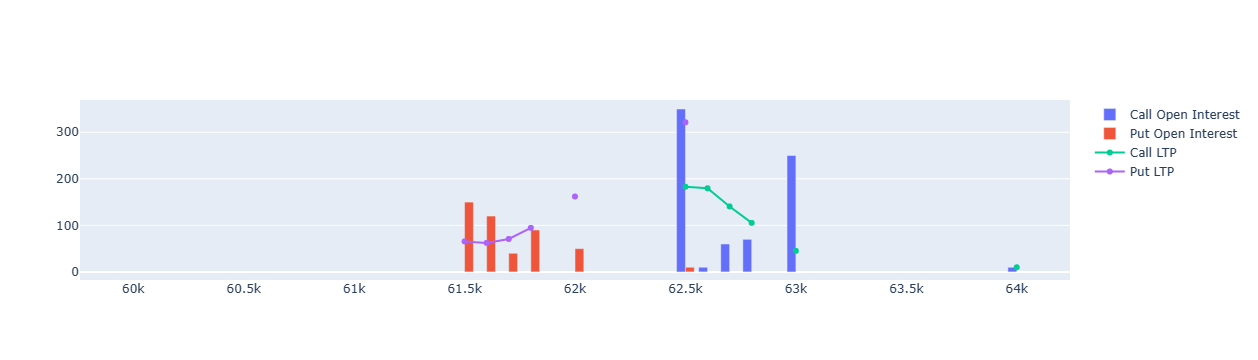

In [127]:
import plotly.graph_objects as go

# assuming df is the dictionary you provided
data = data_chain['Table']

# extract the data for the x and y axes
x = [item['Strike_Price'] for item in data]
y1 = [item['C_Open_Interest'] for item in data]
y2 = [item['Open_Interest'] for item in data]
y3 = [item['C_Last_Trd_Price'] for item in data]
y4 = [item['Last_Trd_Price'] for item in data]
# create the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='Call Open Interest'))
fig.add_trace(go.Bar(x=x, y=y2, name='Put Open Interest'))
fig.add_trace(go.Scatter(x=x, y=y3, name='Call LTP', mode='lines+markers'))
fig.add_trace(go.Scatter(x=x, y=y4, name='Put LTP', mode='lines+markers'))

fig.update_layout(barmode='group')
fig.show()

In [13]:
response.json()['ASON']

[{'DT_TM': '2023-05-15T18:46:24'}]

In [51]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bseindia.com/markets/Derivatives/DeriReports/DeriOptionchain.html'
headers={'User-Agent':'Mozilla/5.0'}
sess=requests.Session()
response=sess.get('https://www.bseindia.com/', headers=headers, timeout=10)
cookies=response.cookies
page = sess.get(url, headers=headers, cookies=cookies, timeout=15)
soup = BeautifulSoup(page.content, 'html.parser')

instrument_spread_type = soup.find('select', {'id': 'ddlInstSprdType'}).find_all('option')
underlying_asset = soup.find('select', {'id': 'ddlAsset'}).find_all('option')
expiry_date = soup.find('select', {'id': 'ddlexpiry'}).find_all('option')

result = {}
for instrument in instrument_spread_type:
    instrument_text = instrument.text.strip()
    result[instrument_text] = {}
    for asset in underlying_asset:
        asset_text = asset.text.strip()
        result[instrument_text][asset_text] = {}
        for date in expiry_date:
            date_text = date.text.strip()
            result[instrument_text][asset_text][date_text] = {}

print(result)

{'Index Futures': {'Select': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}, '{{ddl.UlaCODE}}': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}}, 'Equity Futures': {'Select': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}, '{{ddl.UlaCODE}}': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}}, 'Index Option': {'Select': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}, '{{ddl.UlaCODE}}': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}}, 'Equity Option': {'Select': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}, '{{ddl.UlaCODE}}': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}}, 'IF-Spread': {'Select': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}, '{{ddl.UlaCODE}}': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}}, 'EF-Spread': {'Select': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}, '{{ddl.UlaCODE}}': {'Select': {}, '{{ddl.eXPIRY}}': {}, 'Not Traded': {}}}, 'POC(IO)': {'Select': {'Select': {}, '{{ddl.eXP

In [32]:
cookies

<RequestsCookieJar[]>

In [66]:
a=soup.find('select', {'id': 'ddlAsset'}).find_all('option')
print(a)

[<option value="0">Select</option>, <option ng-repeat="ddl in ddlAsset.Table" value="{{ddl.scrip_cd}}">{{ddl.UlaCODE}}</option>]


In [96]:
from selenium import webdriver

url = 'https://www.bseindia.com/markets/Derivatives/DeriReports/DeriOptionchain.html'

driver = webdriver.Firefox()
driver.get(url)

page_content = driver.page_source
driver.quit()
soup = BeautifulSoup(page_content, 'html.parser')

instrument_spread_type = soup.find('select', {'id': 'ddlInstSprdType'}).find_all('option')
underlying_asset = soup.find('select', {'id': 'ddlAsset'}).find_all('option')
expiry_date = soup.find('select', {'id': 'ddlexpiry'}).find_all('option')

result = {}
for instrument in instrument_spread_type:
    instrument_text = instrument.text.strip()
    result[instrument_text] = {}
    for asset in underlying_asset[1:]:
        asset_text = asset.text.strip()
        result[instrument_text][asset_text] = {}
        date_list=[]
        for date in expiry_date[1:]:
            date_text = date.text.strip()
            date_list.append(date_text)
        result[instrument_text][asset_text] = date_list

print(result)

{'Index Futures': {'SENSEX': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023'], 'BANKEX': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023'], 'SX50': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023']}, 'Equity Futures': {'SENSEX': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023'], 'BANKEX': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023'], 'SX50': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023']}, 'Index Option': {'SENSEX': ['19 May 2023', '26 May 2023', '02 Jun 2023', '09 Jun 2023', '16 Jun 2023', '23 Jun 2023', '30 Jun 2023', '28 Jul 2023'], 'BANKEX': ['19 May 2023

In [98]:
result.keys()

dict_keys(['Index Futures', 'Equity Futures', 'Index Option', 'Equity Option', 'IF-Spread', 'EF-Spread', 'POC(IO)', 'POC(SO)'])

In [101]:
result['Index Option']

{'SENSEX': ['19 May 2023',
  '26 May 2023',
  '02 Jun 2023',
  '09 Jun 2023',
  '16 Jun 2023',
  '23 Jun 2023',
  '30 Jun 2023',
  '28 Jul 2023'],
 'BANKEX': ['19 May 2023',
  '26 May 2023',
  '02 Jun 2023',
  '09 Jun 2023',
  '16 Jun 2023',
  '23 Jun 2023',
  '30 Jun 2023',
  '28 Jul 2023'],
 'SX50': ['19 May 2023',
  '26 May 2023',
  '02 Jun 2023',
  '09 Jun 2023',
  '16 Jun 2023',
  '23 Jun 2023',
  '30 Jun 2023',
  '28 Jul 2023']}